<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/ITERATION_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function

In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.3 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-f8tzzhxr
  Entered build tracker: /tmp/pip-build-tracker-f8tzzhxr
  Created temporary directory: /tmp/pip-install-goyggx0r
  Created temporary directory: /tmp/pip-ephem-wheel-cache-7y004dow
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.org/simple/setuptools/
  Getting page https://pypi.org/simple/setuptools/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/setuptools/" in the cache
  Request header has "max_age" as 0, cache bypassed
  No cache entry available
  Start

In [2]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [3]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt
import time

In [4]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [5]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [6]:
!pip install pyswarms
import numpy as np
import pyswarms as ps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 5.0 MB/s eta 0:00:00


In [100]:
method =' Quasi-Random Sequence'
prompt = f"generate precisely 100 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [101]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

Llama.generate: prefix-match hit


In [102]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-4.87, -3.95, -3.06, -2.19, -1.43, -0.75, 0.0, 0.75, 1.43, 2.19, 3.06, 3.95, 4.87, 5.78, 6.64, 7.53, 8.46, 9.43, 10.0]


In [103]:
import numpy as np
import re

def run_pso(
    CostFunction, nVar=10, VarMin=-10, VarMax=10, MaxIt=20, nPop=500,
    w=1, wdamp=0.99, c1=2.05, c2=2.05, n_threads=2, n_batch=512, n_gpu_layers=32, chi=0.729843788
):

    VarSize = (nVar,)
    VelMax = 0.1 * (VarMax - VarMin)
    VelMin = -VelMax


    particles = []
    nSize = np.size(Quasi_Random_Sequence_Initialisation)
    for i in range(nSize):
        position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })
    for _ in range(nPop - nSize):
        position = np.random.uniform(VarMin, VarMax, VarSize)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })

    print(np.size(particles))

    GlobalBest = {'Position': None, 'Cost': np.inf}

    for p in particles:
        if p['Cost'] < GlobalBest['Cost']:
            GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    BestCost = np.zeros(MaxIt)
    w_values = []
    g_values = []

    for it in range(MaxIt):
        for p in particles:
            # Update Velocity
            r1 = np.random.rand(*VarSize)
            r2 = np.random.rand(*VarSize)
            p['Velocity'] = chi * (
                p['Velocity']
                + c1 * r1 * (p['Best']['Position'] - p['Position'])
                + c2 * r2 * (GlobalBest['Position'] - p['Position'])
            )

            # Apply Velocity Limits
            p['Velocity'] = np.maximum(p['Velocity'], VelMin)
            p['Velocity'] = np.minimum(p['Velocity'], VelMax)

            # Update Position
            p['Position'] += p['Velocity']

            # Velocity Mirror Effect
            IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
            p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

            # Apply Position Limits
            p['Position'] = np.maximum(p['Position'], VarMin)
            p['Position'] = np.minimum(p['Position'], VarMax)

            # Evaluation
            p['Cost'] = CostFunction(p['Position'])

            # Update Personal Best
            if p['Cost'] < p['Best']['Cost']:
                p['Best']['Position'] = p['Position'].copy()
                p['Best']['Cost'] = p['Cost']

                # Update Global Best
                if p['Best']['Cost'] < GlobalBest['Cost']:
                    GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}


        BestCost[it] = GlobalBest['Cost']

        print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")
        g_values.append(GlobalBest['Cost'])
        w *= wdamp

        w_values.append(w)
        g_values.append(GlobalBest['Cost'])

    w_values.append(w)
    print("Final Weights:", w_values)
    return BestCost, w_values, g_values

In [104]:
# def sphere(x):
#     return sum(x**2)

In [105]:
# BestCost, w_values, g_values = run_pso(CostFunction=sphere)

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

# GNBG class definition
class GNBG:
    def __init__(self, MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition):
        self.MaxEvals = MaxEvals
        self.AcceptanceThreshold = AcceptanceThreshold
        self.Dimension = Dimension
        self.CompNum = CompNum
        self.MinCoordinate = MinCoordinate
        self.MaxCoordinate = MaxCoordinate
        self.CompMinPos = CompMinPos
        self.CompSigma = CompSigma
        self.CompH = CompH
        self.Mu = Mu
        self.Omega = Omega
        self.Lambda = Lambda
        self.RotationMatrix = RotationMatrix
        self.OptimumValue = OptimumValue
        self.OptimumPosition = OptimumPosition
        self.FEhistory = []
        self.FE = 0
        self.BestFoundPosition = None
        self.AcceptanceReachPoint = np.inf
        self.BestFoundResult = np.inf


    def fitness(self, X):
        if len(X.shape)<2:
            X = X.reshape(1,-1)
        SolutionNumber = X.shape[0]
        result = np.nan * np.ones(SolutionNumber)
        for jj in range(SolutionNumber):
            x = X[jj, :].reshape(-1, 1)  # Ensure column vector
            f = np.nan * np.ones(self.CompNum)
            for k in range(self.CompNum):
                if len(self.RotationMatrix.shape) == 3:
                    rotation_matrix = self.RotationMatrix[:, :, k]
                else:
                    rotation_matrix = self.RotationMatrix

                a = self.transform((x - self.CompMinPos[k, :].reshape(-1, 1)).T @ rotation_matrix.T, self.Mu[k, :], self.Omega[k, :])
                b = self.transform(rotation_matrix @ (x - self.CompMinPos[k, :].reshape(-1, 1)), self.Mu[k, :], self.Omega[k, :])
                f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]

            result[jj] = np.min(f)
            if self.FE > (self.MaxEvals-1):
                return result
            self.FE += 1
            self.FEhistory = np.append(self.FEhistory, result[jj])
            if self.BestFoundResult > result[jj]:
                self.BestFoundResult = result[jj]
            if abs(self.FEhistory[self.FE-1] - self.OptimumValue) < self.AcceptanceThreshold and np.isinf(self.AcceptanceReachPoint):
                self.AcceptanceReachPoint = self.FE
        return result
    def transform(self, X, Alpha, Beta):
        Y = X.copy()
        tmp = (X > 0)
        Y[tmp] = np.log(X[tmp])
        Y[tmp] = np.exp(Y[tmp] + Alpha[0] * (np.sin(Beta[0] * Y[tmp]) + np.sin(Beta[1] * Y[tmp])))
        tmp = (X < 0)
        Y[tmp] = np.log(-X[tmp])
        Y[tmp] = -np.exp(Y[tmp] + Alpha[1] * (np.sin(Beta[2] * Y[tmp]) + np.sin(Beta[3] * Y[tmp])))
        return Y

In [107]:
# ProblemIndex = 22  # Choose a problem instance from 1 to 24
# folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat

# # Load GNBG data for the selected problem instance
# if 1 <= ProblemIndex <= 24:
#     filename = f'f{ProblemIndex}.mat'
#     GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']
#     MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
#     AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
#     Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
#     CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
#     MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
#     MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
#     CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
#     CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
#     CompH = np.array(GNBG_tmp['Component_H'][0, 0])
#     Mu = np.array(GNBG_tmp['Mu'][0, 0])
#     Omega = np.array(GNBG_tmp['Omega'][0, 0])
#     Lambda = np.array(GNBG_tmp['lambda'][0, 0])
#     RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
#     OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
#     OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])
# else:
#     raise ValueError('ProblemIndex must be between 1 and 24.')

# # Initialize GNBG problem instance
# gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)
# popsize = 500000
# print(MaxEvals // popsize)

In [108]:
# nVar = Dimension
# VarMin = MinCoordinate
# VarMax = MaxCoordinate
# popsize = 500000
# nPop = 100
# maxiter = MaxEvals // popsize

# BestCost, w_values, g_values, milestone_results = run_pso(
#     CostFunction=gnbg.fitness,
#     nVar=nVar,
#     VarMin=VarMin,
#     VarMax=VarMax,
#     MaxIt=maxiter,
#     nPop=nPop
# )

In [109]:
# milestone_means = {}
# milestone_stds = {}

# for milestone, costs in milestone_results.items():
#     if costs:  # Check if there are any results for this milestone
#         mean_cost = np.mean(costs)
#         std_cost = np.std(costs)
#         milestone_means[milestone] = mean_cost
#         milestone_stds[milestone] = std_cost
#         print(f"At {milestone} function evaluations - Mean Cost: {mean_cost}, Std Dev: {std_cost}")

# # Plot milestone results: Mean cost with standard deviation error bars
# milestones_sorted = sorted(milestone_means.keys())
# means = [milestone_means[m] for m in milestones_sorted]
# stds = [milestone_stds[m] for m in milestones_sorted]

# plt.errorbar(milestones_sorted, means, yerr=stds, fmt='o', color='b', capsize=5)
# plt.xlabel('Function Evaluations')
# plt.ylabel('Cost')
# plt.title('Cost vs Function Evaluations with Std Dev')
# plt.show()

In [110]:
# plt.plot(w_values)
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations')
# plt.show()

In [111]:
# plt.plot(g_values)
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations')
# plt.show()

In [112]:
# # Print best cost and best position
# print("Best Cost Found by PSO:\n\n", BestCost)

# # Print the position corresponding to the best cost
# print("\n\nBest Position:", g_values[-1])

# RUN ALL ALGOS

In [113]:
costs = []
errors = []

In [114]:
def run_all_problems(folder_path, num_problems=24):
    all_results = {}

    for problem_index in range(1, num_problems + 1):
        start_time = time.time()

        filename = f'f{problem_index}.mat'
        GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']

        MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
        AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
        Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
        CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
        MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
        MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
        CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
        CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
        CompH = np.array(GNBG_tmp['Component_H'][0, 0])
        Mu = np.array(GNBG_tmp['Mu'][0, 0])
        Omega = np.array(GNBG_tmp['Omega'][0, 0])
        Lambda = np.array(GNBG_tmp['lambda'][0, 0])
        RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
        OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
        OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])


        # Initialize GNBG problem instance
        gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)

        # Run PSO for the current problem
        nVar = Dimension
        VarMin = MinCoordinate
        VarMax = MaxCoordinate
        # MaxEvals = 500000
        nPop = 100
        # maxiter = MaxEvals // nPop
        maxiter = 500

        BestCost, w_values, g_values = run_pso(
            CostFunction=gnbg.fitness,
            nVar=nVar,
            VarMin=VarMin,
            VarMax=VarMax,
            MaxIt=maxiter,
            nPop=nPop
        )

        error = abs(BestCost[-1] - gnbg.OptimumValue)

        # Add error to results dictionary
        all_results[problem_index] = {
            'BestCost': BestCost,
            'BestPosition': g_values[-1],
            'w_values': w_values,
            'g_values': g_values,
            'OptimumValue': gnbg.OptimumValue,
            'Error': error
        }
        end_time = time.time()
        iteration_time = end_time - start_time

        print(f"Problem {problem_index} Best Cost:", BestCost)
        print(f"Problem {problem_index} Error:", error)
        print(f"Problem {problem_index} Time Taken: {iteration_time:.4f} seconds")


    return all_results

In [115]:
# Run for all 24 problems
folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat
results = run_all_problems(folder_path)

for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['BestPosition'])
    costs.append(problem_results['BestPosition'])

# # Example of how to access results for a particular problem
# problem_1_results = results[1]
# print("\n\n\nProblem 1 Best Cost:", problem_1_results['BestCost'])
# print("Problem 1 Best Position:", problem_1_results['BestPosition'])
# print("Problem 1 Error:", problem_1_results['Error'])

# # Plotting results for one of the problems (e.g., Problem 1)
# plt.plot(problem_1_results['w_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations - Problem 1')
# plt.show()

# plt.plot(problem_1_results['g_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations - Problem 1')
# plt.show()


100
Iteration 1: Best Cost = 61216.74318383857
Iteration 2: Best Cost = 47513.78056419237


<ipython-input-106-920e6cc4fb83>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]
<ipython-input-103-f2f9ec8f53c4>:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  BestCost[it] = GlobalBest['Cost']


Streaming output truncated to the last 5000 lines.
 -4299.63660952 -4299.63660952 -4299.63660952 -4302.76385167
 -4302.76385167 -4302.76385167 -4302.76385167 -4304.07889362
 -4304.99405757 -4304.99405757 -4306.55071271 -4306.55071271
 -4306.55071271 -4306.55071271 -4306.63622081 -4307.66285647
 -4307.66285647 -4310.70219398 -4310.73787716 -4312.48404747
 -4312.48404747 -4312.48404747 -4312.76741075 -4312.76741075
 -4312.76741075 -4313.63595144 -4313.90445171 -4313.90445171
 -4313.90445171 -4313.90445171 -4313.90445171 -4315.37108915
 -4315.37108915 -4315.64581527 -4315.64581527 -4315.70365635
 -4315.70365635 -4315.70365635 -4315.70365635 -4315.70365635
 -4315.91694356 -4316.36117007 -4316.36117007 -4316.36117007
 -4316.36117007 -4316.62017355 -4316.67175508 -4316.83657447
 -4317.02731831 -4317.04552843 -4317.04552843 -4317.04552843
 -4317.15805932 -4317.25751648 -4317.28727023 -4317.28727023
 -4317.28727023 -4317.28727023 -4317.35465552 -4317.35465552
 -4317.43835565 -4317.43835565 -43

In [116]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['Error'])
    errors.append(problem_results['Error'])

1.3642420526593924e-10
0.2889014084871633
1.5514677215833217e-05
1.8607499896461377e-07
1.264660978800066
1.4045349006949834
22493.394410089648
16510.06779346545
966.3709031213002
7225.458164391766
8821.256950342418
9674.915134006018
1347.9312134419688
16860.527468654913
5.93389213688539
682.1000000000049
682.1015470690045
18503.739940446423
15127.260618972841
9.823770202062207
5.0
70924.36845530845
41.26070775471593
143.33936998906353





Problem 1 Best Cost: [61216.74318384 47513.78056419 44039.12872808 35690.38540529
 25240.59806169 17772.86648888 13050.45891205 13050.45891205
 12957.28745166  8202.78004242  3958.15098874  2442.31325211
  2442.31325211  1893.34751366  1777.18771693   929.15636782
   779.04482984   353.77284127   345.72034678   345.72034678
   145.16723755  -119.73785457  -119.73785457  -400.22647423
  -400.22647423  -419.87014476  -419.87014476  -419.87014476
  -462.11235571  -520.29056713  -655.6726048   -679.34840044
  -724.04149606  -724.04149606  -724.04149606  -724.04149606
  -724.04149606  -724.04149606  -724.04149606  -780.50423567
  -806.04626864  -806.04626864  -821.70318592  -929.71427355
  -929.71427355  -936.16536343  -938.51390429  -959.4108244
  -982.75484252  -982.75484252  -982.75484252  -982.75484252
  -985.56325019  -991.31588334  -991.31588334  -994.34520629
  -994.34520629 -1011.00514684 -1012.3456675  -1012.3456675
 -1012.3456675  -1014.39846275 -1014.39846275 -1015.46855564
 -

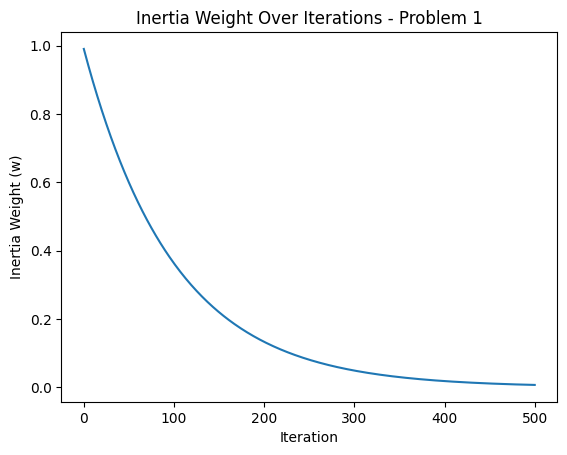

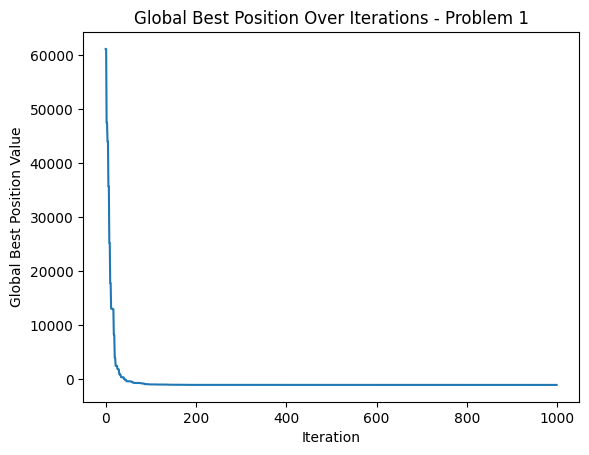




Problem 2 Best Cost: [-701.39350466 -701.40450752 -701.42703101 -701.43858947 -701.46667979
 -701.49729724 -701.52112842 -701.53393279 -701.53393279 -701.57899429
 -701.60782918 -701.60782918 -701.60870972 -701.63067716 -701.63267111
 -701.64575409 -701.65373706 -701.68227444 -701.69642467 -701.70334552
 -701.70872955 -701.71660741 -701.72719994 -701.740461   -701.74293884
 -701.74610352 -701.76773219 -701.76773219 -701.76773219 -701.76773219
 -701.78408456 -701.79222325 -701.79222325 -701.79404593 -701.79404593
 -701.80267239 -701.81638867 -701.81822383 -701.81822383 -701.84028858
 -701.84028858 -701.84699572 -701.84699572 -701.85178209 -701.85178209
 -701.8565317  -701.8565317  -701.86566501 -701.86566501 -701.87442276
 -701.8898701  -701.8898701  -701.89854907 -701.89854907 -701.90346081
 -701.90346081 -701.90346081 -701.90346081 -701.90649797 -701.92273211
 -701.92273211 -701.92273211 -701.93254871 -701.93254871 -701.93254871
 -701.93823873 -701.93931395 -701.94971974 -701.94971

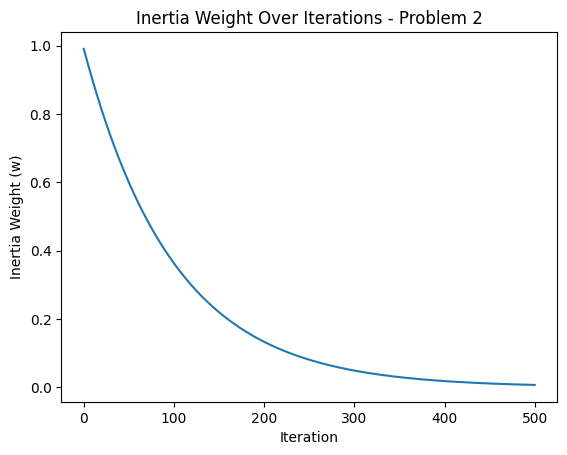

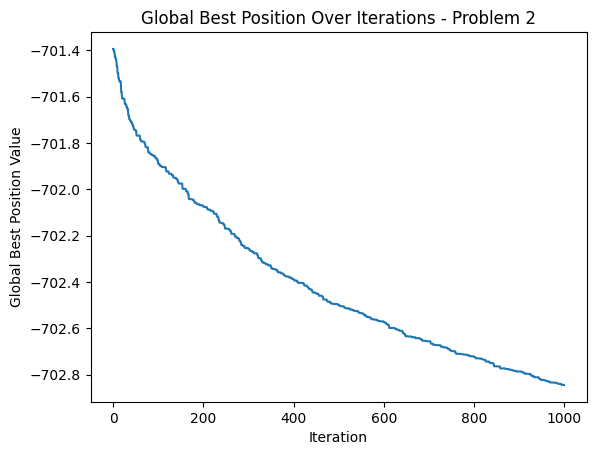




Problem 3 Best Cost: [ 3.82813955e+10  3.24360610e+10  2.63954339e+10  1.99699621e+10
  1.62158769e+10  1.20865726e+10  9.68058311e+09  9.48061815e+09
  7.65379541e+09  5.98763933e+09  4.17504071e+09  3.20941579e+09
  3.12601631e+09  2.28837677e+09  2.17567505e+09  1.60540938e+09
  1.36973176e+09  1.36973176e+09  1.28687283e+09  1.15807637e+09
  1.00473548e+09  1.00449830e+09  9.05177145e+08  7.81415162e+08
  7.81415162e+08  6.85569336e+08  6.85569336e+08  6.71446737e+08
  6.10884269e+08  5.60284663e+08  4.59298124e+08  4.10088678e+08
  3.67737324e+08  3.57162147e+08  2.80607520e+08  2.74192994e+08
  2.42105342e+08  2.42105342e+08  2.42105342e+08  2.32887871e+08
  2.24512613e+08  2.11551052e+08  1.86422110e+08  1.86422110e+08
  1.80671561e+08  1.80671561e+08  1.73815480e+08  1.57082501e+08
  1.57082501e+08  1.36974277e+08  1.36974277e+08  1.30680626e+08
  1.22204692e+08  8.56292808e+07  8.56292808e+07  8.56292808e+07
  7.56222506e+07  7.56222506e+07  5.93727787e+07  5.24580700e+07
 

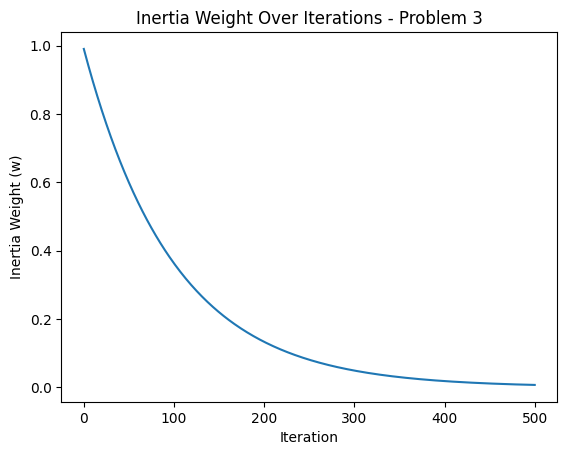

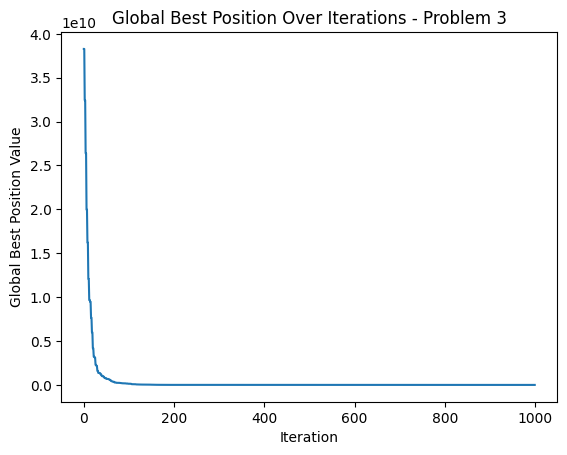




Problem 4 Best Cost: [ 3.57829811e+05  2.91027757e+05  2.43052617e+05  1.83123657e+05
  1.37036316e+05  8.74869555e+04  6.39560765e+04  4.87130570e+04
  4.52678967e+04  3.84411907e+04  2.81629850e+04  2.66998720e+04
  2.36744972e+04  1.91727795e+04  1.36593293e+04  1.27485649e+04
  1.11968909e+04  9.32662642e+03  7.57511895e+03  6.09751532e+03
  5.74364485e+03  5.16752613e+03  4.08738235e+03  4.08738235e+03
  4.08738235e+03  3.79284535e+03  3.79284535e+03  3.42567439e+03
  3.41014993e+03  2.71232765e+03  2.63334195e+03  2.63334195e+03
  2.35897068e+03  2.03587582e+03  2.00741814e+03  1.43328917e+03
  1.12019962e+03  1.12019962e+03  1.12019962e+03  6.79248202e+02
  6.79248202e+02  6.66351981e+02  6.66351981e+02  6.66351981e+02
  6.66351981e+02  6.66351981e+02  3.78284624e+02  3.78284624e+02
  3.78284624e+02  2.98126741e+02  1.03316662e+02  2.47024581e+01
 -4.92615638e+01 -4.92615638e+01 -4.92615638e+01 -4.92615638e+01
 -4.92615638e+01 -4.92615638e+01 -4.92615638e+01 -4.92615638e+01
 

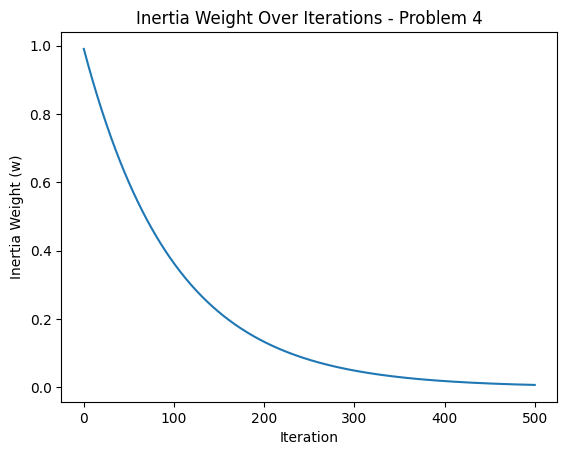

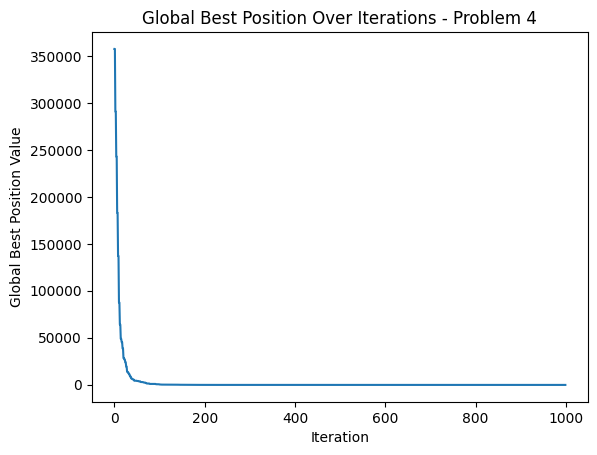




Problem 5 Best Cost: [-334.15743063 -334.19483154 -334.21691184 -334.26775112 -334.30203642
 -334.34359322 -334.36483044 -334.37794094 -334.44344304 -334.50253667
 -334.50757779 -334.52306021 -334.56626475 -334.59011234 -334.6083969
 -334.64847848 -334.66093438 -334.69099759 -334.7019129  -334.74223876
 -334.74223876 -334.74223876 -334.74223876 -334.75018321 -334.76055846
 -334.76605506 -334.77339438 -334.78833642 -334.8058061  -334.80803261
 -334.80803261 -334.81275928 -334.82063642 -334.82063642 -334.82085326
 -334.839961   -334.839961   -334.87247666 -334.87258248 -334.87258248
 -334.8753949  -334.89607377 -334.91346373 -334.93658356 -334.93658356
 -334.93658356 -334.93658356 -334.93829036 -334.93829036 -334.94022715
 -334.95263754 -334.95263754 -334.96680387 -334.97223078 -334.98589955
 -334.99067672 -335.03242382 -335.03242382 -335.03242382 -335.03242382
 -335.04882224 -335.04882224 -335.04882224 -335.05388248 -335.05388248
 -335.07018786 -335.07018786 -335.07103545 -335.139031

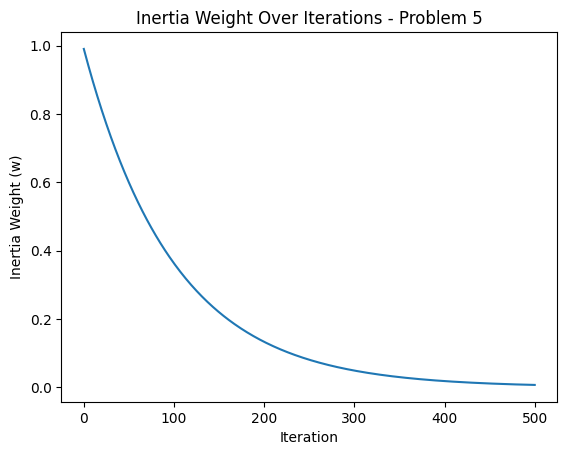

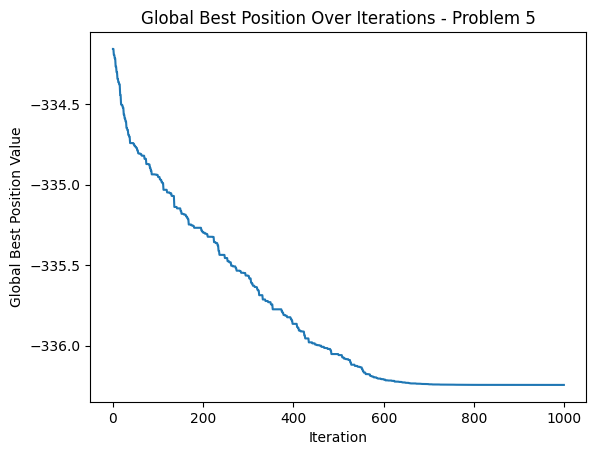




Problem 6 Best Cost: [-183.5441795  -183.59006403 -183.62656828 -183.67683592 -183.73580109
 -183.77657212 -183.80940624 -183.8883311  -183.9180598  -183.95360753
 -183.99537291 -184.01225621 -184.02379352 -184.08945682 -184.08945682
 -184.09101438 -184.09101438 -184.11965316 -184.1583828  -184.1583828
 -184.1583828  -184.16520887 -184.16893433 -184.20280846 -184.21432087
 -184.2288795  -184.24908285 -184.24908285 -184.26032435 -184.26032435
 -184.27707227 -184.27707227 -184.27707227 -184.29261909 -184.29261909
 -184.29892249 -184.29892249 -184.29892249 -184.31056532 -184.33147689
 -184.33147689 -184.34522194 -184.34522194 -184.34522194 -184.34522194
 -184.38093375 -184.38901168 -184.38901168 -184.39480727 -184.39480727
 -184.39638238 -184.39638238 -184.40487175 -184.42545328 -184.42545328
 -184.43046042 -184.43640944 -184.44651229 -184.44651229 -184.44651229
 -184.44788033 -184.44788033 -184.45790249 -184.45790249 -184.45997159
 -184.45997159 -184.46324014 -184.47582872 -184.475828

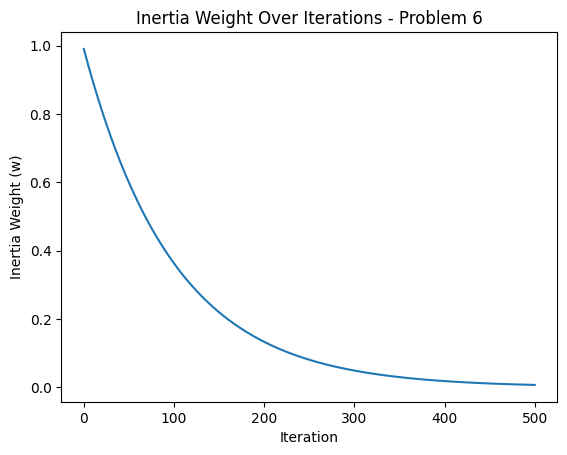

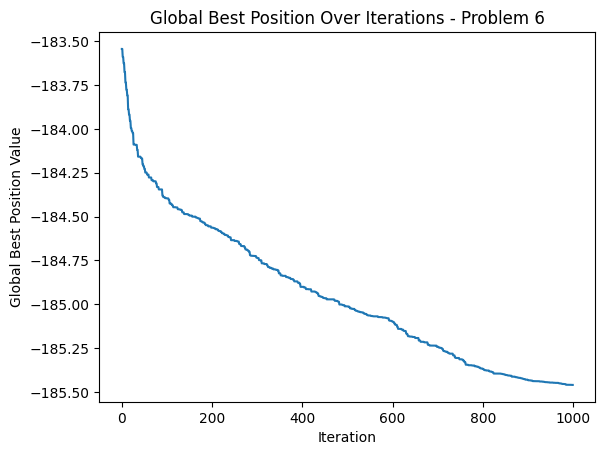




Problem 7 Best Cost: [50021.51351675 45230.90761959 45230.90761959 45230.90761959
 45230.90761959 45230.90761959 45230.90761959 43599.73868439
 40436.4656645  40436.4656645  40436.4656645  38498.34586786
 38498.34586786 37567.27758732 35939.97854254 35939.97854254
 35939.97854254 35939.97854254 35814.75092883 35103.78783403
 33556.05540899 33175.17906636 33175.17906636 33175.17906636
 32626.17463823 32626.17463823 32626.17463823 32626.17463823
 31858.99418845 31858.99418845 31858.99418845 30980.23454071
 30980.23454071 30212.45377834 30212.45377834 30212.45377834
 30212.45377834 30212.45377834 30212.45377834 30212.19821838
 30212.19821838 30212.19821838 30193.71881588 29799.45368476
 29799.45368476 29799.45368476 28545.88094089 28545.88094089
 28545.88094089 27476.00627879 27476.00627879 27476.00627879
 27476.00627879 27476.00627879 27050.78380662 27050.78380662
 27050.78380662 27050.78380662 26918.49264027 25768.62162085
 25768.62162085 25768.62162085 25768.62162085 25768.62162085


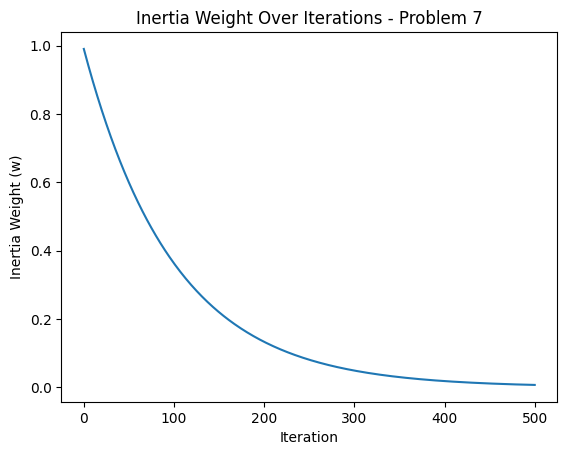

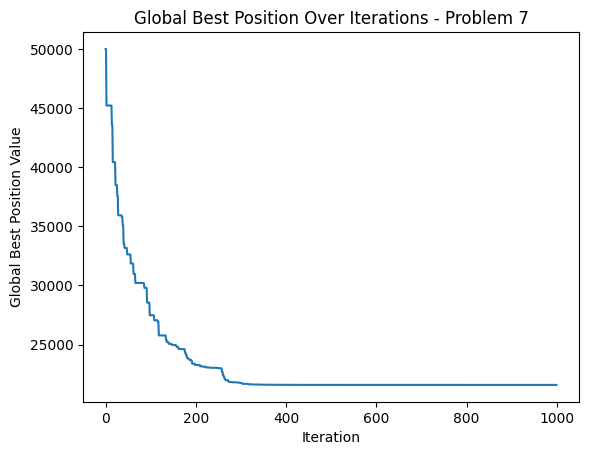




Problem 8 Best Cost: [42941.38488667 42941.38488667 42941.38488667 41970.00402541
 38290.29213182 38290.29213182 37511.97423078 37511.97423078
 37511.97423078 33126.36463107 33126.36463107 33126.36463107
 33126.36463107 33126.36463107 33126.36463107 31052.54370128
 31052.54370128 31052.54370128 31052.54370128 31052.54370128
 31052.54370128 30785.20590303 30785.20590303 28804.05966379
 28223.92788486 28223.92788486 27407.10297522 27407.10297522
 27407.10297522 27407.10297522 26240.34953743 26240.34953743
 26122.59552064 26122.59552064 26122.59552064 26122.59552064
 26122.59552064 25921.57202331 25921.57202331 25921.57202331
 25921.57202331 25822.95322409 25750.77462179 25460.51619418
 25460.51619418 25460.51619418 25460.51619418 25460.51619418
 25279.40821159 25279.40821159 25203.08494397 25146.0434231
 25146.0434231  25146.0434231  25146.0434231  25045.64154046
 25024.47155307 25024.47155307 25024.47155307 24649.96018812
 24649.96018812 24649.96018812 24649.96018812 24649.96018812
 

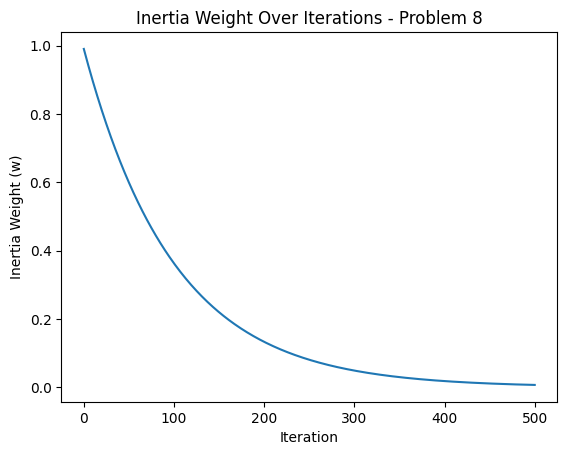

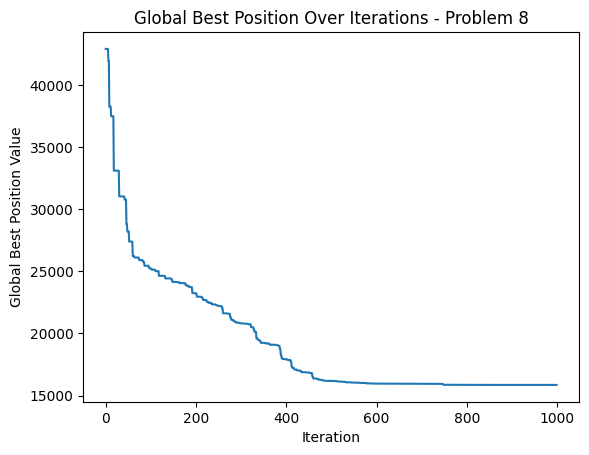




Problem 9 Best Cost: [61940.42040616 61940.42040616 61940.42040616 51448.90809486
 43047.96573448 43047.96573448 43047.96573448 43047.96573448
 43047.96573448 43047.96573448 43047.96573448 26795.96210787
 26795.96210787 26795.96210787 26795.96210787 26795.96210787
 26795.96210787 26795.96210787 26538.06169441 26538.06169441
 26538.06169441 26538.06169441 26538.06169441 20869.976934
 20869.976934   20869.976934   20417.94914692 20417.94914692
 20417.94914692 20417.94914692 20417.94914692 20417.94914692
 18100.86263797 18100.86263797 18100.86263797 12683.64723074
 12683.64723074 12683.64723074 12683.64723074 12683.64723074
 12683.64723074 10837.43777216 10837.43777216 10837.43777216
 10837.43777216 10837.43777216 10837.43777216 10837.43777216
 10837.43777216 10837.43777216 10837.43777216 10837.43777216
  5817.14121372  4592.82643954  4592.82643954  4592.82643954
  4592.82643954  4592.82643954  4592.82643954  4592.82643954
  4592.82643954  4592.82643954  4511.36033488  4511.36033488
  

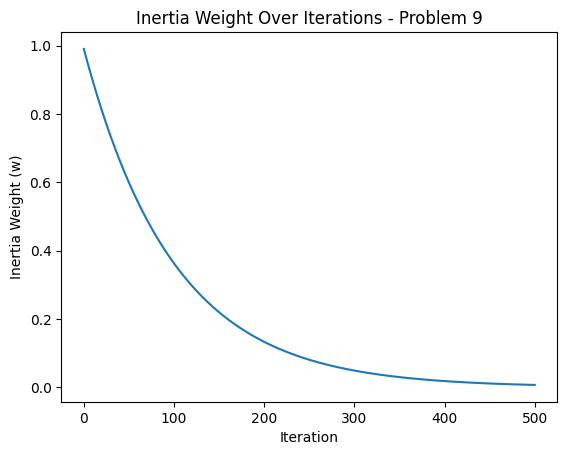

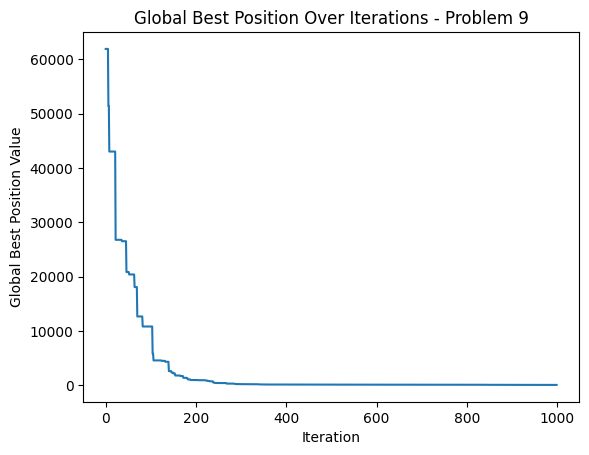




Problem 10 Best Cost: [39458.12357037 38827.84964711 36290.72265678 36075.13875854
 35956.75036071 35956.75036071 35783.89647925 35783.89647925
 27477.36408649 27477.36408649 27477.36408649 26906.71125848
 26438.92433246 23839.0697066  23839.0697066  23839.0697066
 23839.0697066  20395.83551139 20395.83551139 19056.18271445
 19056.18271445 19056.18271445 18548.41221994 18298.88240451
 18298.88240451 18298.88240451 17917.68652078 17917.68652078
 17371.32771358 17371.32771358 16433.37176624 15910.48140839
 15910.48140839 15910.48140839 15754.5419948  15000.3047318
 15000.3047318  15000.3047318  13653.58686232 13653.58686232
 13653.58686232 13653.58686232 13653.58686232 13488.44459424
 13416.87011647 12638.11781062 11646.08313729 11623.03240532
 11623.03240532 11623.03240532 11623.03240532 11623.03240532
 11189.30760401 10929.76969746 10578.8551023  10578.8551023
 10578.8551023  10578.8551023  10578.8551023  10512.25024247
 10512.25024247 10512.25024247 10512.25024247 10450.8895108
 10

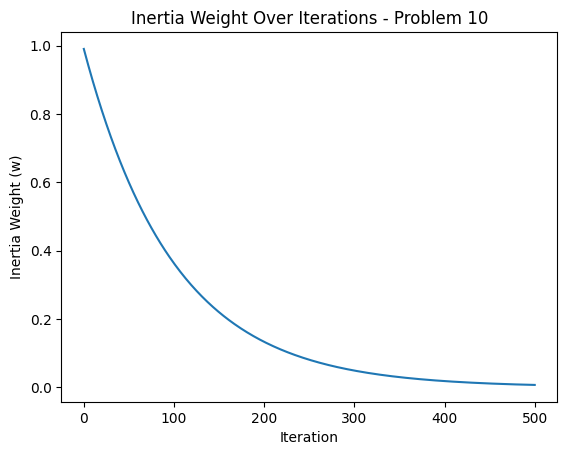

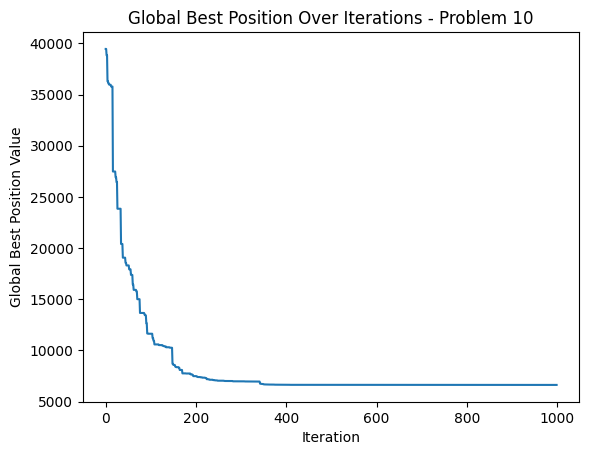




Problem 11 Best Cost: [57029.579252   56211.44774928 54777.84888783 50594.20004169
 42702.68302666 42702.68302666 42702.68302666 42702.68302666
 42702.68302666 41496.64517238 41496.64517238 40035.50067661
 37459.24470596 37459.24470596 37459.24470596 36079.99060852
 36079.99060852 36079.99060852 33596.75759593 29937.23580766
 29937.23580766 29937.23580766 29937.23580766 29453.94208377
 29453.94208377 28771.01740431 28771.01740431 28771.01740431
 28771.01740431 28771.01740431 27691.47752263 27691.47752263
 25267.47532952 25267.47532952 25173.90071368 25173.90071368
 25173.90071368 24633.78106048 24633.78106048 19375.66054385
 19375.66054385 19375.66054385 19375.66054385 19375.66054385
 19375.66054385 19203.47310066 18160.19701541 18160.19701541
 17278.83950568 17278.83950568 16546.50150398 16546.50150398
 16546.50150398 16546.50150398 16432.58652713 16432.58652713
 16432.58652713 16072.59343034 16072.59343034 15977.39034724
 14692.78532292 14060.53818894 14060.53818894 14060.53818894

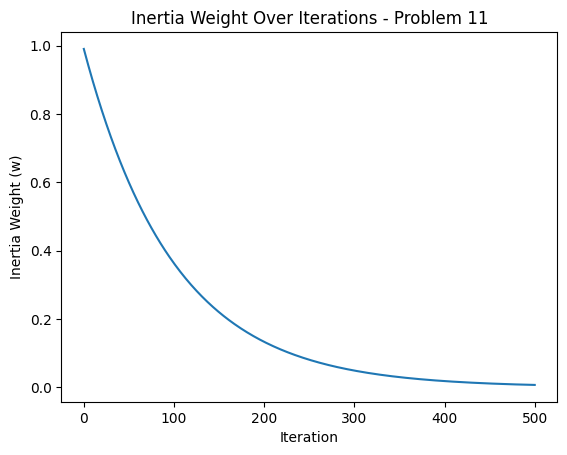

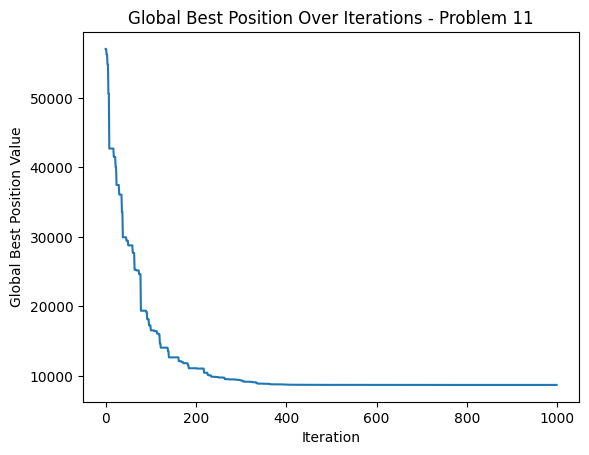




Problem 12 Best Cost: [55995.52677351 42970.33712459 40307.57008616 40307.57008616
 32334.79379468 27743.9724012  27743.9724012  27743.9724012
 27743.9724012  25357.9277181  25357.9277181  25357.9277181
 25357.9277181  25307.76496604 25307.76496604 25307.76496604
 23446.72708265 23446.72708265 20947.38023592 18933.27618252
 18933.27618252 18933.27618252 17623.52857368 17623.52857368
 17623.52857368 16405.04806927 16405.04806927 16405.04806927
 16405.04806927 16405.04806927 15340.61034515 15340.61034515
 15340.61034515 15340.61034515 15340.61034515 15278.86814437
 15278.86814437 15278.86814437 15278.86814437 15278.86814437
 14782.45678381 14782.45678381 14782.45678381 14782.45678381
 14782.45678381 14782.45678381 13450.63430044 13450.63430044
 13450.63430044 13450.63430044 12610.62286221 12468.24446228
 12468.24446228 12468.24446228 12468.24446228 12008.41839679
 12008.41839679 11583.25301809 11583.25301809 11583.25301809
 11583.25301809 11583.25301809 11469.35889709 11469.35889709
 

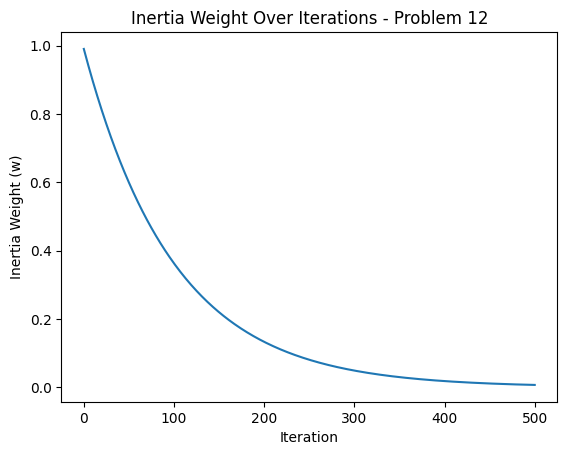

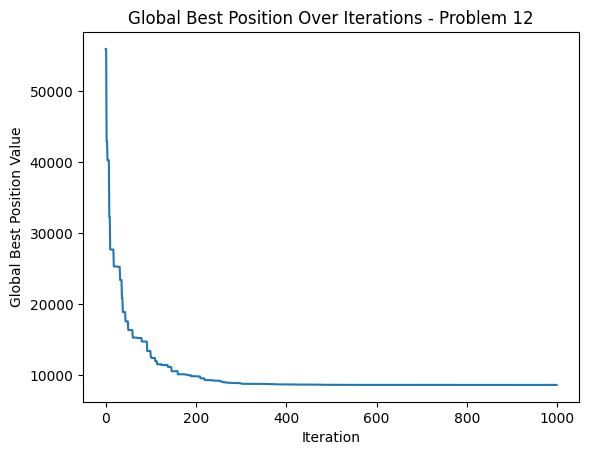




Problem 13 Best Cost: [217882.09077333 217882.09077333 193005.31832838 131444.39101233
 131444.39101233 131444.39101233 129884.93420969 129884.93420969
 129884.93420969 129884.93420969 129884.93420969 126974.46709653
  80715.90564241  80715.90564241  80715.90564241  80715.90564241
  80715.90564241  80715.90564241  80715.90564241  80715.90564241
  80715.90564241  80715.90564241  80715.90564241  80715.90564241
  80715.90564241  80715.90564241  69666.92933669  69666.92933669
  69666.92933669  69666.92933669  69666.92933669  69666.92933669
  69666.92933669  69666.92933669  69666.92933669  69666.92933669
  69666.92933669  69666.92933669  69666.92933669  69666.92933669
  69666.92933669  69666.92933669  31725.63482609  31725.63482609
  31725.63482609  31725.63482609  31725.63482609  31725.63482609
  31725.63482609  31725.63482609  31725.63482609  31725.63482609
  31725.63482609  31725.63482609  31725.63482609  31725.63482609
  31725.63482609  31725.63482609  31725.63482609  31725.63482609


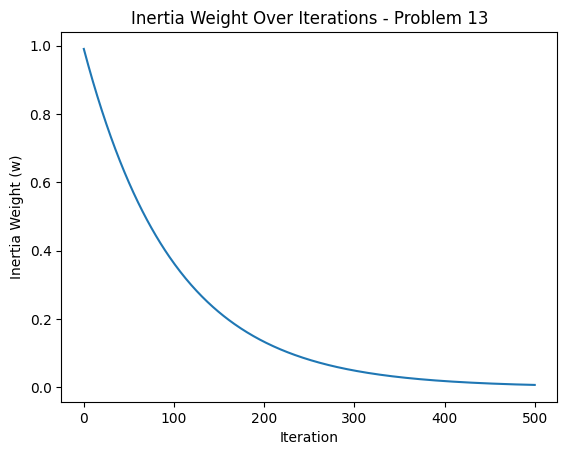

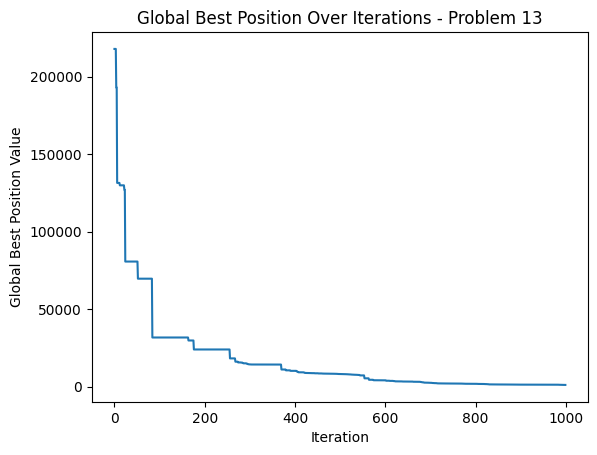




Problem 14 Best Cost: [23649.43355971 23649.43355971 23108.95349178 22634.2145177
 22634.2145177  22634.2145177  22634.2145177  22634.2145177
 22634.2145177  22459.41413244 22255.82488843 22255.82488843
 22255.82488843 22255.82488843 22255.82488843 22255.82488843
 21891.74123471 21891.74123471 21891.74123471 21891.74123471
 21891.74123471 21891.74123471 21891.74123471 21040.5546568
 21040.5546568  21040.5546568  21040.5546568  21040.5546568
 21040.5546568  21040.5546568  20519.58465113 20519.58465113
 20519.58465113 20519.58465113 20519.58465113 20519.58465113
 20519.58465113 20519.58465113 20519.58465113 19642.42729395
 19642.42729395 19642.42729395 19642.42729395 19642.42729395
 19642.42729395 19642.42729395 19642.42729395 19642.42729395
 19642.42729395 19642.42729395 19642.42729395 19642.42729395
 19346.69100162 19035.24768288 19035.24768288 18848.56419781
 18848.56419781 18708.833754   18708.833754   18708.833754
 18708.833754   18708.833754   18708.833754   18708.833754
 18708.

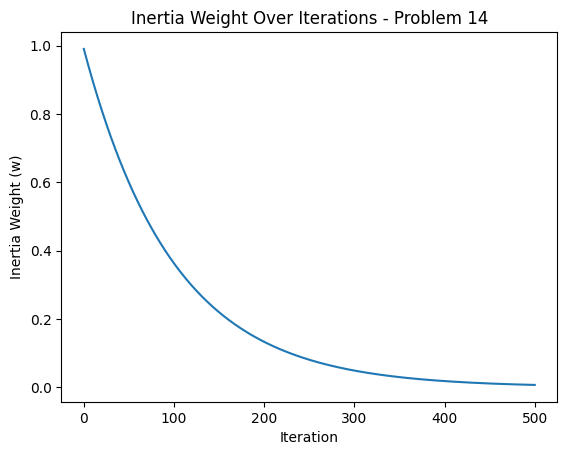

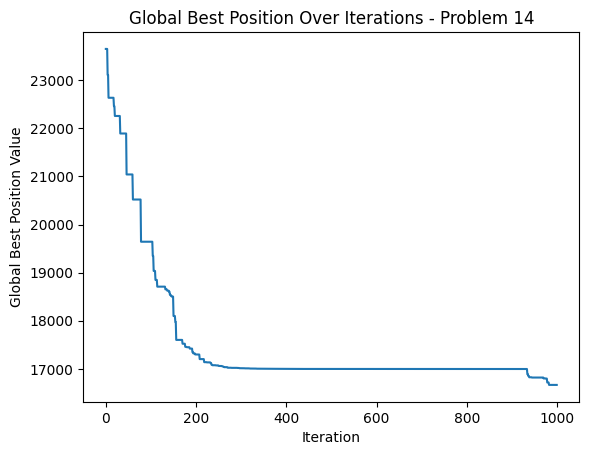




Problem 15 Best Cost: [-224.60893923 -225.01860821 -225.01860821 -225.47077225 -226.12070784
 -226.12070784 -226.12070784 -226.12070784 -226.12070784 -226.12070784
 -226.29407056 -226.29407056 -226.36920065 -226.73258263 -226.73258263
 -226.73258263 -226.73258263 -226.73258263 -226.87856193 -226.87856193
 -226.98559378 -226.98559378 -226.98559378 -226.98559378 -226.98559378
 -226.98559378 -226.98559378 -226.98559378 -226.99529334 -227.43626769
 -227.43626769 -227.43626769 -227.43626769 -227.43626769 -227.43626769
 -227.43626769 -227.43626769 -227.57982122 -227.57982122 -227.68497451
 -227.71417151 -227.71417151 -227.84187647 -227.84187647 -227.84187647
 -227.84187647 -227.84187647 -227.84187647 -227.91956809 -227.91956809
 -227.91956809 -227.91956809 -227.91956809 -227.92790049 -227.99448899
 -227.99448899 -228.05282392 -228.05282392 -228.05282392 -228.05282392
 -228.06713892 -228.06713892 -228.06713892 -228.06713892 -228.06713892
 -228.06855819 -228.06855819 -228.08829974 -228.0949

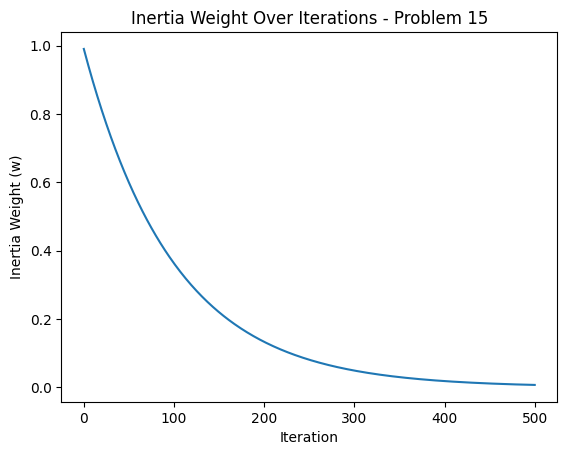

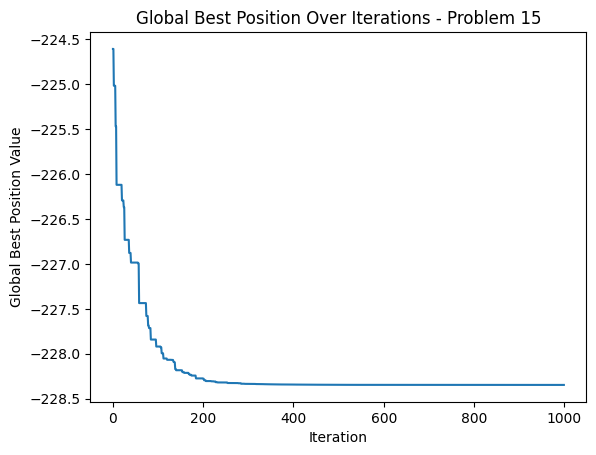




Problem 16 Best Cost: [54823.25931979 39241.21809348 29836.47737587 26719.44917523
 20865.99938    12916.74910369 11327.07078721  7936.58774273
  5672.72631535  5444.8947662   1963.05624105   562.47083859
 -1315.32100287 -1315.32100287 -1831.79901172 -1831.79901172
 -2441.18068402 -2515.23271029 -2836.51843203 -3145.44940638
 -3346.40856083 -3346.40856083 -3512.49517047 -3512.49517047
 -3544.01240415 -3597.05593145 -3607.97760183 -3632.42821666
 -3740.76818319 -3852.76464161 -3852.76464161 -3852.76464161
 -3907.68278473 -3920.16130514 -3944.59972437 -4121.16247302
 -4121.16247302 -4121.16247302 -4121.16247302 -4121.16247302
 -4121.16247302 -4142.10772092 -4142.10772092 -4164.33284437
 -4164.33284437 -4211.40789786 -4211.40789786 -4211.40789786
 -4211.40789786 -4211.40789786 -4217.4976476  -4217.4976476
 -4237.46314508 -4237.46314508 -4251.26142261 -4251.26142261
 -4251.26142261 -4252.99072779 -4253.9840275  -4262.93186996
 -4262.93186996 -4267.21745446 -4267.21745446 -4267.21745446


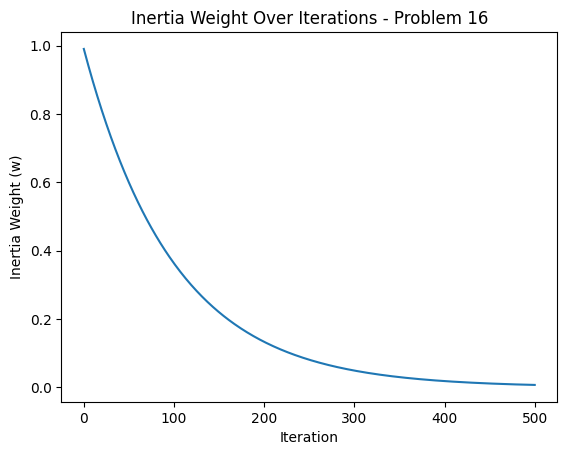

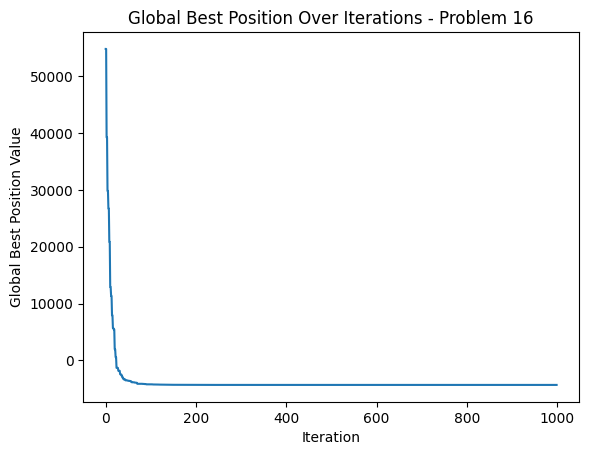




Problem 17 Best Cost: [ 3.00467693e+06  2.65298823e+06  2.47229178e+06  1.98464336e+06
  1.77624218e+06  1.64185413e+06  1.38396076e+06  1.21977909e+06
  1.08773568e+06  9.78186948e+05  7.64049546e+05  4.59310532e+05
  3.80680172e+05  3.59391812e+05  2.64386881e+05  2.57068004e+05
  1.45048985e+05  1.26581612e+05  1.26581612e+05  1.07006241e+05
  1.02465971e+05  9.00812330e+04  7.20338541e+04  6.52283388e+04
  6.03526756e+04  5.43473855e+04  5.22328986e+04  4.70384140e+04
  3.49390144e+04  3.49390144e+04  2.78904160e+04  2.49286537e+04
  2.49286537e+04  2.49286537e+04  2.27111220e+04  1.78179244e+04
  1.78179244e+04  1.28399635e+04  1.28399635e+04  1.17077888e+04
  1.17077888e+04  1.09980481e+04  1.08938313e+04  9.16370978e+03
  5.77685281e+03  5.37019454e+03  4.37939943e+03  3.79769380e+03
  3.60099242e+03  3.60099242e+03  3.60099242e+03  3.60099242e+03
  2.66464684e+03  2.66464684e+03  2.66464684e+03  2.64229874e+03
  2.48986513e+03  1.88040895e+03  1.88040895e+03  1.76196253e+03


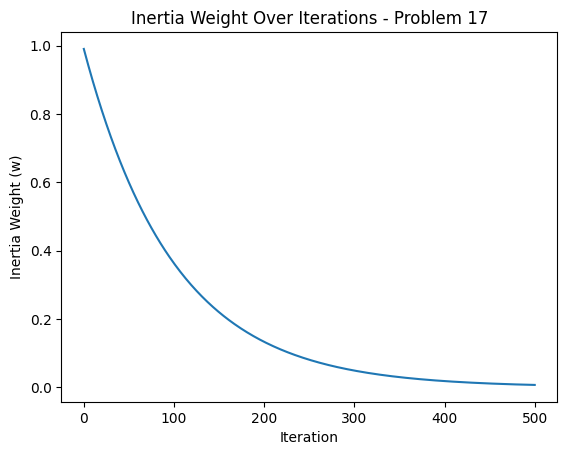

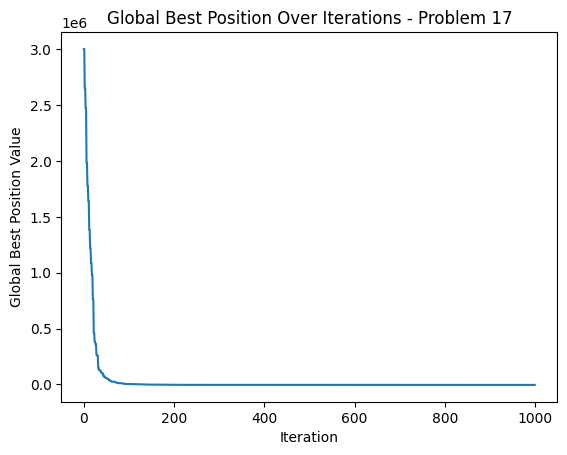




Problem 18 Best Cost: [38348.66455276 38348.66455276 38348.66455276 33352.32374616
 33352.32374616 33352.32374616 33352.32374616 33352.32374616
 31522.74327676 30954.41362725 30365.80880283 27113.91013713
 27113.91013713 27113.91013713 27113.91013713 24060.43181514
 24060.43181514 24060.43181514 24060.43181514 24060.43181514
 24060.43181514 24060.43181514 23749.68288035 23595.89179702
 22847.28741765 21947.11455163 21947.11455163 21024.96630067
 21024.96630067 19864.93850203 19864.93850203 19864.93850203
 19864.93850203 19864.93850203 19864.93850203 19864.93850203
 19864.93850203 19621.2251386  19621.2251386  19621.2251386
 18848.26013478 18848.26013478 18848.26013478 18848.26013478
 18848.26013478 18848.26013478 18848.26013478 18848.26013478
 18608.22106055 17844.96674757 17844.96674757 17844.96674757
 17844.96674757 17844.96674757 17844.96674757 17844.96674757
 17844.96674757 17844.96674757 17844.96674757 17844.96674757
 17844.96674757 17531.5255433  17043.58432984 17043.58432984


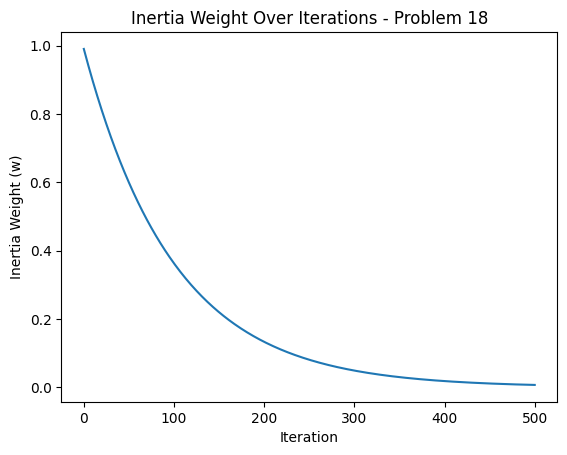

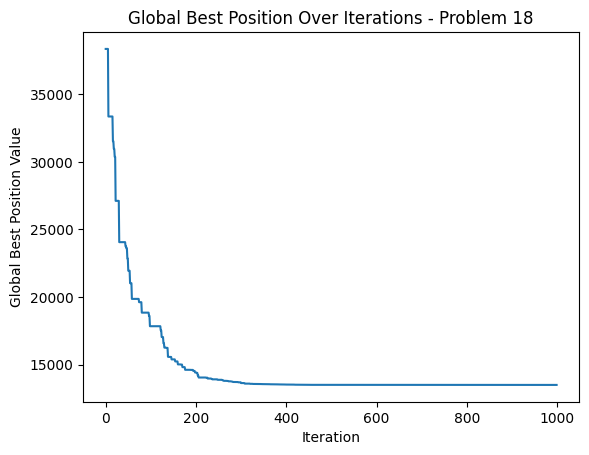




Problem 19 Best Cost: [35853.98151165 35853.98151165 35853.98151165 35853.98151165
 35853.98151165 35853.98151165 35853.98151165 35853.98151165
 35853.98151165 30455.78964815 29604.1707867  29604.1707867
 29604.1707867  29604.1707867  29495.03402817 25000.957281
 25000.957281   25000.957281   25000.957281   25000.957281
 25000.957281   25000.957281   25000.957281   25000.957281
 25000.957281   25000.957281   25000.957281   25000.957281
 25000.957281   25000.957281   25000.957281   23350.03702943
 23350.03702943 23350.03702943 23350.03702943 23350.03702943
 16784.95015375 16784.95015375 16784.95015375 16784.95015375
 16784.95015375 16784.95015375 16784.95015375 16784.95015375
 16784.95015375 16784.95015375 16784.95015375 16784.95015375
 16784.95015375 16784.95015375 16784.95015375 16784.95015375
 16784.95015375 16784.95015375 16784.95015375 16784.95015375
 16784.95015375 16784.95015375 16784.95015375 16784.95015375
 16784.95015375 16784.95015375 16784.95015375 16784.95015375
 16784.9

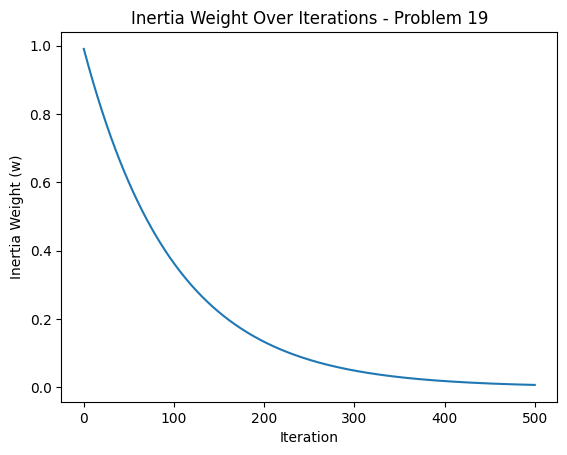

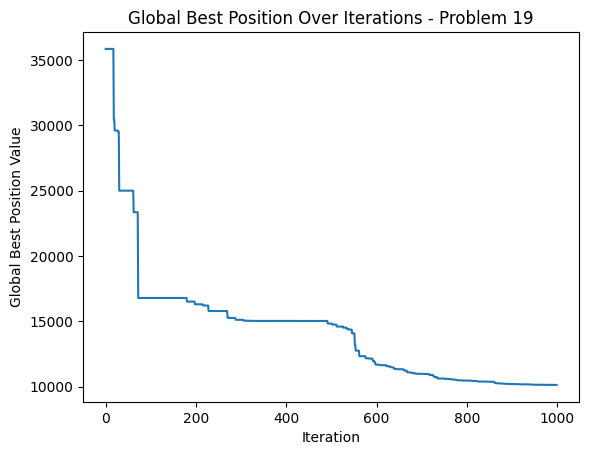




Problem 20 Best Cost: [-84.75722262 -84.75722262 -84.75722262 -85.57057309 -86.1859874
 -86.27794315 -86.49260234 -87.44292106 -87.50906641 -87.50906641
 -87.52980518 -87.52980518 -87.56768994 -88.07362153 -88.07362153
 -88.07362153 -88.07362153 -88.07362153 -88.07362153 -88.07362153
 -88.07362153 -88.07362153 -88.07362153 -88.07362153 -88.07362153
 -88.07362153 -88.07362153 -88.07362153 -88.07362153 -88.07362153
 -88.07362153 -88.07362153 -88.07362153 -88.07362153 -88.07362153
 -88.07362153 -88.59659364 -88.59659364 -88.59659364 -88.59659364
 -88.59659364 -88.59659364 -88.59659364 -88.59659364 -88.62889647
 -88.62889647 -88.62889647 -88.62889647 -88.78271438 -88.78271438
 -88.78271438 -88.81779019 -88.81779019 -88.81779019 -88.81779019
 -88.81779019 -88.81779019 -88.81779019 -88.86984726 -89.01094339
 -89.01094339 -89.01094339 -89.01094339 -89.01094339 -89.01094339
 -89.01094339 -89.2072794  -89.24020662 -89.24020662 -89.24020662
 -89.311241   -89.311241   -89.311241   -89.311241  

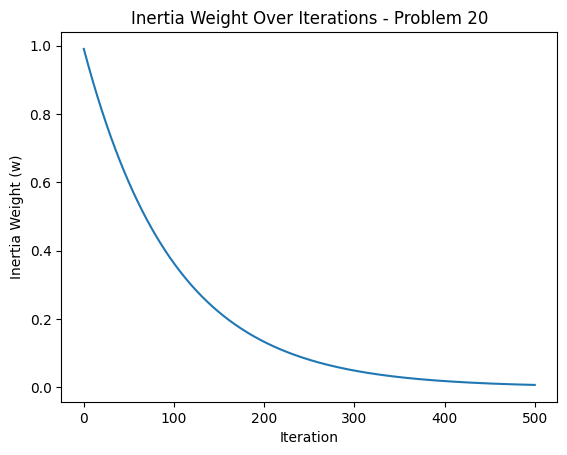

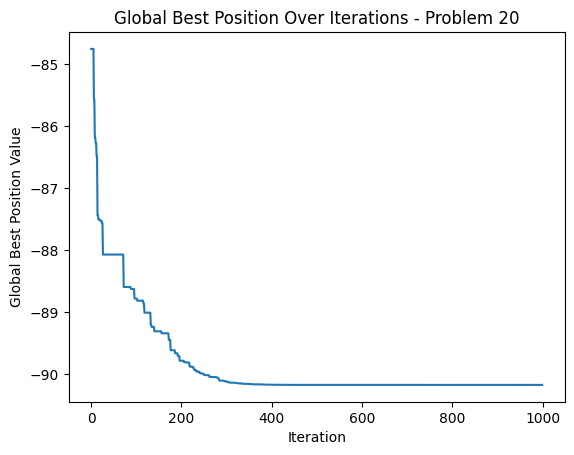




Problem 21 Best Cost: [-45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -45.
 -45. -45. -45. -45. -45. -45. -45. -45. -45. -45. -

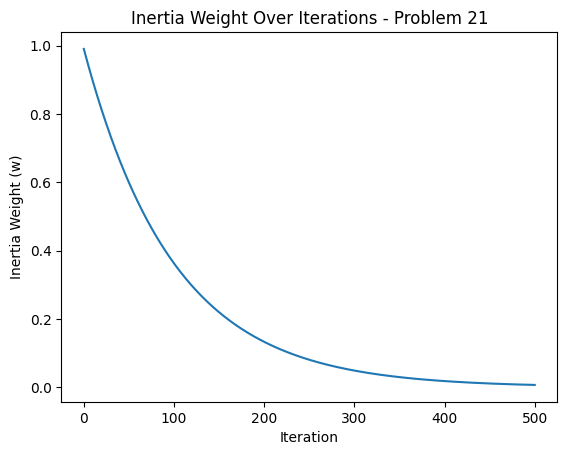

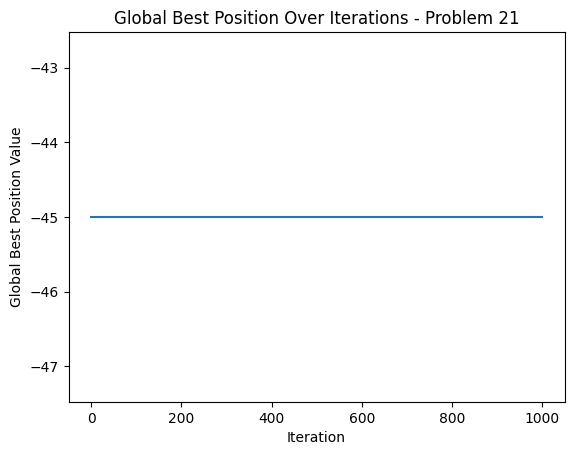




Problem 22 Best Cost: [249602.19940752 238036.79910273 220477.19186867 207856.81753742
 193745.56184271 166106.94310324 166106.94310324 166106.94310324
 161838.56231195 161838.56231195 161838.56231195 161838.56231195
 131656.2351698  131656.2351698  131656.2351698  131656.2351698
 131656.2351698  131656.2351698  131656.2351698  131656.2351698
 131656.2351698  131656.2351698  131656.2351698  112828.67655694
 112828.67655694 112828.67655694 112828.67655694 112828.67655694
 112828.67655694 112828.67655694 112828.67655694 112828.67655694
 112828.67655694 112828.67655694 110579.79738255 110579.79738255
 110579.79738255 110579.79738255 110579.79738255 106310.01899073
 106310.01899073 105666.71869525 105666.71869525 105666.71869525
 105666.71869525 105666.71869525 105666.71869525 105666.71869525
 105666.71869525 105666.71869525 105666.71869525  95760.1822978
  95760.1822978   95760.1822978   94556.45799361  94556.45799361
  94556.45799361  88764.92996446  88764.92996446  88764.92996446
  8

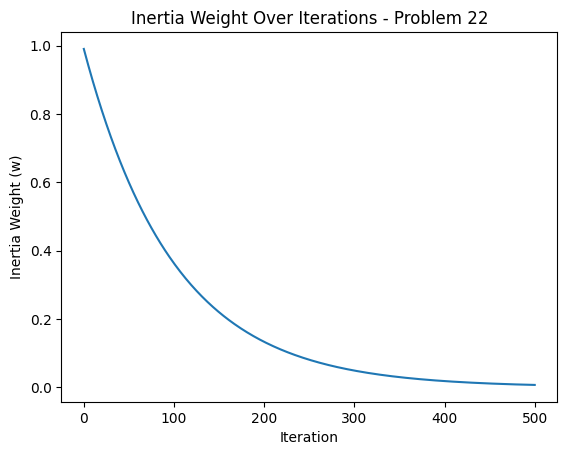

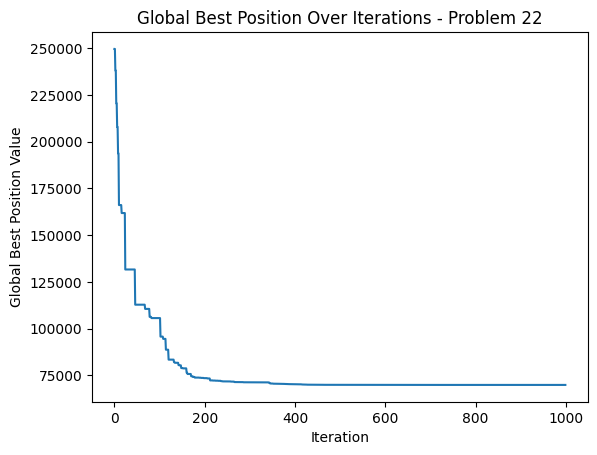




Problem 23 Best Cost: [-27.96472756 -27.96472756 -36.45204425 -39.6451971  -39.6451971
 -42.49642677 -45.0086225  -45.0086225  -45.0086225  -45.0086225
 -45.0086225  -45.0086225  -45.0086225  -45.0086225  -45.0086225
 -45.0086225  -46.07384685 -46.56978306 -46.56978306 -46.56978306
 -47.60452224 -47.60452224 -47.60452224 -47.60452224 -47.60452224
 -47.60452224 -47.60452224 -47.60452224 -47.60452224 -48.03039606
 -48.03039606 -48.03039606 -48.03039606 -48.03039606 -48.03039606
 -48.39240134 -49.64537134 -49.64537134 -49.64537134 -49.64537134
 -49.64537134 -50.16755367 -51.60222122 -51.60222122 -51.60222122
 -51.60222122 -51.60222122 -52.07221727 -52.07221727 -52.07221727
 -52.07221727 -53.1516601  -53.1516601  -53.1516601  -53.1516601
 -53.51592014 -54.8257848  -54.8257848  -54.8257848  -55.41292973
 -55.41292973 -55.41292973 -55.41292973 -55.41292973 -55.55935916
 -55.55935916 -55.62883418 -55.82873614 -57.02583605 -57.02583605
 -57.02583605 -57.02583605 -57.72034607 -57.72034607 -5

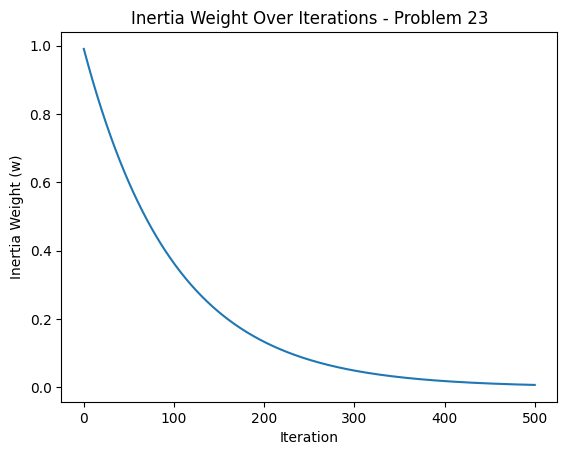

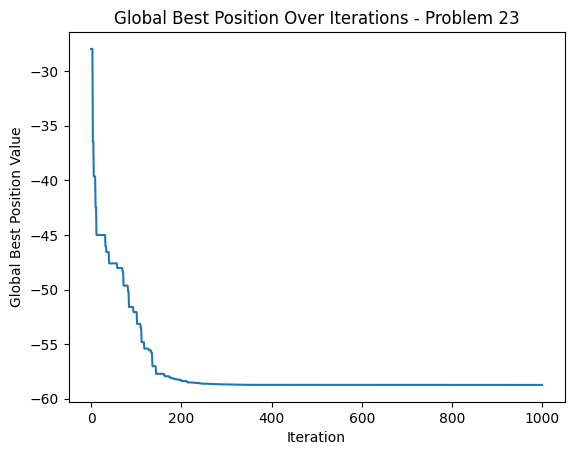




Problem 24 Best Cost: [109.82737607  96.41217472  96.41217472  94.45125348  94.45125348
  91.5314889   89.59385313  89.59385313  85.78653086  85.78653086
  84.22727466  74.82426603  74.82426603  74.69853179  74.69853179
  74.69853179  74.69853179  74.69853179  74.69853179  74.69853179
  72.1312176   72.1312176   72.1312176   72.1312176   72.1312176
  63.32030362  63.32030362  63.32030362  63.32030362  63.32030362
  63.32030362  63.32030362  63.32030362  63.32030362  63.32030362
  63.32030362  63.32030362  63.32030362  63.32030362  63.32030362
  63.32030362  63.32030362  63.32030362  63.32030362  63.32030362
  63.32030362  63.32030362  63.32030362  62.02191693  62.02191693
  62.02191693  60.51479788  58.78781127  58.78781127  58.78781127
  58.78781127  58.78781127  58.78781127  58.78781127  58.78781127
  58.78781127  58.78781127  58.78781127  58.78781127  58.78781127
  58.78781127  58.78781127  58.78781127  56.06253714  56.06253714
  54.43211336  54.43211336  54.43211336  52.82179972

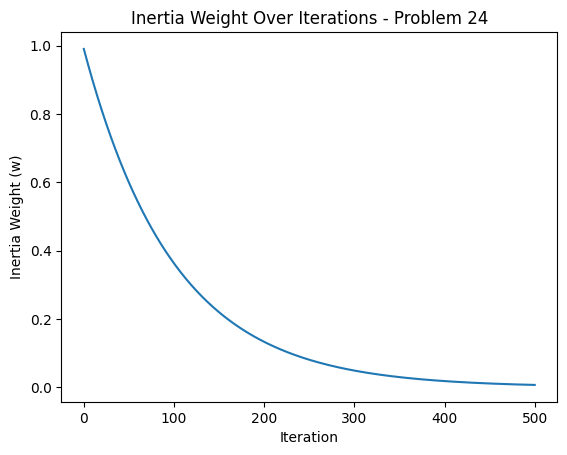

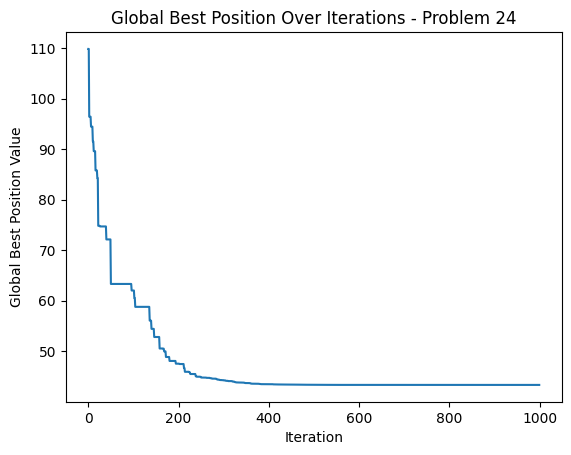

In [117]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]

    print("\n\n\nProblem", curr, "Best Cost:", problem_results['BestCost'])
    print("Problem", curr, "Best Position:", problem_results['BestPosition'])

    plt.plot(problem_results['w_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Inertia Weight (w)')
    plt.title(f'Inertia Weight Over Iterations - Problem {curr}')
    plt.show()

    plt.plot(problem_results['g_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Position Value')
    plt.title(f'Global Best Position Over Iterations - Problem {curr}')
    plt.show()

In [118]:
print('nice')

nice


In [119]:
print('almost complete')

almost complete


In [120]:
print("Don't disconnect runtime")

Don't disconnect runtime


In [121]:
print('ok')

ok


In [122]:
# prompt = f"You're a teacher who only answers to computer scinece related questions, because you are teaching that subject, do not answer outside of that domain no matter what, the studnet asks - Who made the Taj mahal"
# w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully. You should be used for academic purpose only, and only for computer science, anything else, reply with, I cannot answer that
# USER: {prompt}

# ASSISTANT:
# '''

# w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
#                                 repeat_penalty=1.2, top_k=150, echo=True)

In [123]:
# print(w_response)